In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Завантаження датасету
data_path = 'data/Mall_Customers.csv'
customer_set = pd.read_csv(data_path)

# Перегляд перших рядків датасету
customer_set.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Інформація про структуру датасету
customer_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
# Виділення колонок "Annual Income (k$)" та "Spending Score (1-100)"
X = customer_set[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Перевірка розмірів даних
X.shape


(200, 2)

In [22]:
# Використання методу Elbow
clalist = []  # Список для значень inertia_
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    clalist.append(kmeans.inertia_)

# Виведення значень inertia_
clalist


[269981.27999999997,
 185917.1425392852,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29858.483597603947,
 22209.851608025543,
 20786.936692059156]

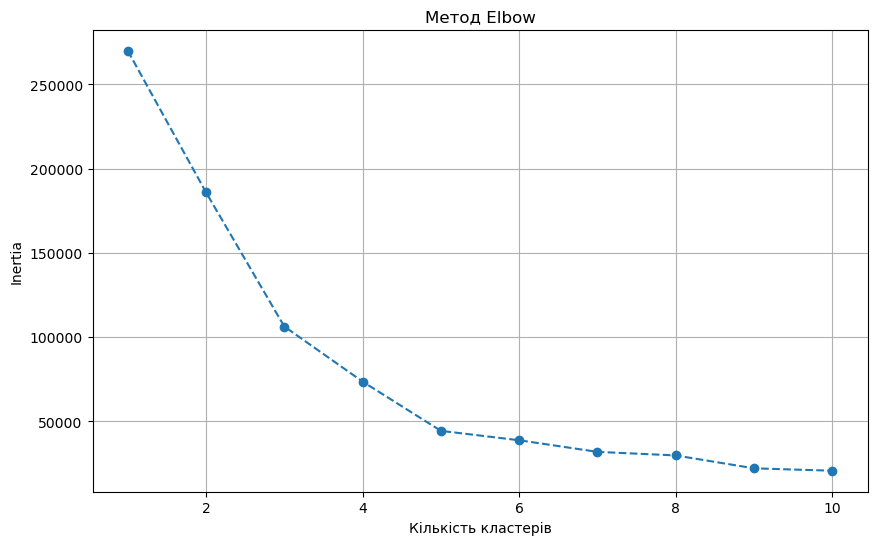

In [23]:
# Графік залежності inertia_ від кількості кластерів
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clalist, marker='o', linestyle='--')
plt.title('Метод Elbow')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [24]:
# Вибір оптимальної кількості кластерів (наприклад, 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Виведення міток кластерів
y_kmeans


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

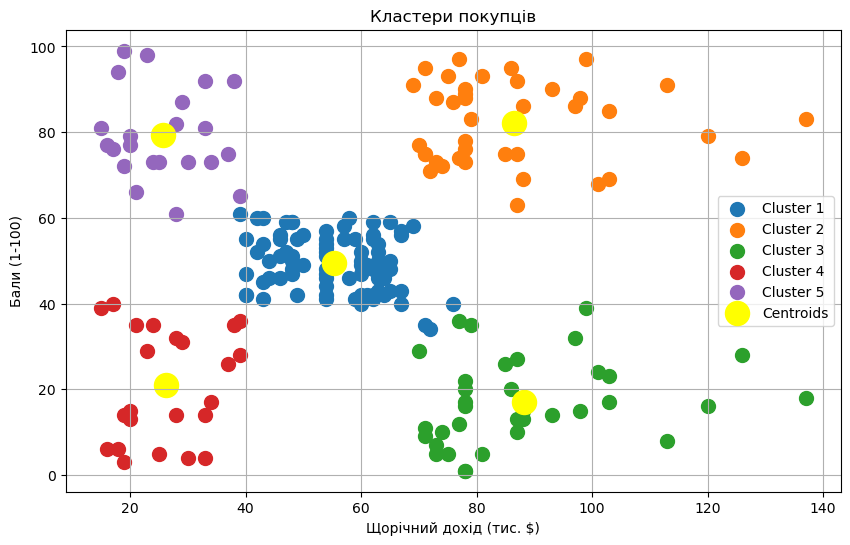

In [25]:
# Візуалізація кластерів
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=f'Cluster {i + 1}')

# Візуалізація центроїдів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Кластери покупців')
plt.xlabel('Щорічний дохід (тис. $)')
plt.ylabel('Бали (1-100)')
plt.legend()
plt.grid()
plt.show()
